## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [75]:
# Imports here

# import pytorch library
import torch
# import nn, optim, tensor modules
from torch import nn, optim, tensor
# import functional module
import torch.nn.functional as F
# import numpy library
import numpy as np
# import pytorch vision library
import torchvision
# import transforms, datasets, and models modules
from torchvision import transforms, datasets, models
# import json library
import json
# import matplotlib library
import matplotlib.pyplot as plt
# import PIL
import PIL
# import image module
from PIL import Image
# import seaborn
import seaborn as sns



In [4]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [5]:
# TODO: Define your transforms for the training, validation, and testing sets

data_transforms = {
    # transforms for training set
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),

    # transforms for validation set
    'valid': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),

    # transforms for testing set
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])
}

# TODO: Load the datasets with ImageFolder

image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform = data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform = data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform = data_transforms['test'])
}

# TODO: Using the image datasets and the transforms, define the dataloaders

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size = 64, shuffle = True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size = 64, shuffle = True),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size = 64, shuffle = True)
}

In [93]:
# TODO: Build and train your network

# build network
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load  pre-trained VGG network
model = models.vgg16(weights = torchvision.models.VGG16_Weights.DEFAULT)

# define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
# freeze parameters
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential(nn.Linear(25088,2048),
                           nn.ReLU(),
                           nn.Linear(2048, 256),
                           nn.ReLU(),
                           nn.Linear(256, 102),
                           nn.LogSoftmax(dim = 1))

# attach new classifier to model
model.classifier = classifier

# train network
# set model to device
model = model.to(device)

# track the loss and accuracy on the validation set
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001)

# set training parameters
epochs = 5
steps = 0
running_loss = 0
print_every = 10

for epoch in range(epochs):
    training_loss = 0
    validation_loss = 0
    accuracy = 0

    # iterate training data
    for inputs, labels in dataloaders['train']:
        steps += 1
        # move input and label tensors to device
        inputs, labels = inputs.to(device), labels.to(device)

        # forward pass
        outputs = model.forward(inputs)

        # calculate loss
        loss = criterion(outputs, labels)

        # zeroing out accumlated gradients
        optimizer.zero_grad()

        # backpropgation
        loss.backward()

        # optimization step
        optimizer.step()

        # update running loss
        running_loss += loss.item()

        # iterate print_every and evaluate
        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.inference_mode():
                for inputs, labels in dataloaders['valid']:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model.forward(inputs)
                    batch_loss = criterion(outputs, labels)
                    valid_loss += batch_loss.item()

                    # calculate accuracy
                    ps = torch.exp(outputs)
                    top_p, top_class = ps.topk(1, dim = 1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()



            print(f"Epoch {epoch + 1} / {epochs}.. "
                  f"Training loss: {running_loss/len(dataloaders['train']):.3f}.. "
                  f"Validation loss: {valid_loss/len(dataloaders['valid']):.3f}.. "
                  f"Validation accuracy: {accuracy/len(dataloaders['valid']):.3f}")

            running_loss = 0
            model.train()


Epoch 1 / 5.. Training loss: 0.435.. Validation loss: 4.057.. Validation accuracy: 0.142
Epoch 1 / 5.. Training loss: 0.371.. Validation loss: 3.433.. Validation accuracy: 0.223
Epoch 1 / 5.. Training loss: 0.310.. Validation loss: 2.907.. Validation accuracy: 0.342
Epoch 1 / 5.. Training loss: 0.259.. Validation loss: 2.365.. Validation accuracy: 0.419
Epoch 1 / 5.. Training loss: 0.218.. Validation loss: 1.978.. Validation accuracy: 0.500
Epoch 1 / 5.. Training loss: 0.199.. Validation loss: 1.931.. Validation accuracy: 0.516
Epoch 1 / 5.. Training loss: 0.186.. Validation loss: 1.640.. Validation accuracy: 0.563
Epoch 1 / 5.. Training loss: 0.157.. Validation loss: 1.567.. Validation accuracy: 0.593
Epoch 1 / 5.. Training loss: 0.163.. Validation loss: 1.550.. Validation accuracy: 0.599
Epoch 1 / 5.. Training loss: 0.142.. Validation loss: 1.409.. Validation accuracy: 0.625
Epoch 2 / 5.. Training loss: 0.128.. Validation loss: 1.301.. Validation accuracy: 0.648
Epoch 2 / 5.. Trainin

In [94]:
## Testing your network
# TODO: Do validation on the test set
test_loss = 0
accuracy = 0
model.to('cuda')

with torch.inference_mode():
  for inputs, labels in dataloaders['test']:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model.forward(inputs)
    batch_loss = criterion(outputs, labels)
    test_loss += batch_loss.item()

    # calculate accuracy
    ps = torch.exp(outputs)
    top_p, top_class = ps.topk(1, dim = 1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test accuracy: {accuracy/len(dataloaders['test'])*100:.2f}%")

Test accuracy: 74.84%


In [95]:
## Save Checkpoint

# TODO: Save the checkpoint
# map classes of indices to training dataset
model.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {'model' : model,
             'epoch' : epochs,
             'model_state_dict' : model.state_dict(),
             'class_to_idx' : model.class_to_idx,
             'optimizer' : optimizer.state_dict()
}

# save serialized object to disk
torch.save(checkpoint, 'checkpoint.pth')


In [96]:
## Loading the Checkpoint

# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
  checkpoint = torch.load('checkpoint.pth')
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
  optimizer.load_state_dict(checkpoint['optimizer'])
  model.class_to_idx = checkpoint['class_to_idx']
  epoch = checkpoint['epoch']
  return model

# load checkpoint
loaded_model = load_checkpoint('checkpoint.pth')

In [97]:
## Image Preprocessing

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''

    # TODO: Process a PIL image for use in a PyTorch model
    # opens image
    img = PIL.Image.open(image)

    # original dimensions
    width, height = img.size

    # resize image to shortest size 256 pixels, keeping the aspect ratio
    if width < height:
        size=[256, 10000]
    else:
        size=[10000, 256]

    img.thumbnail(size)

    # crop to the center 224x224 portion of image
    center = width/4, height/4
    left, bottom, right, top = center[0]-(244/2), center[1]-(244/2), center[0]+(244/2), center[1]+(244/2)
    img = img.crop((left, bottom, right, top))

    # convert image to a numpy array
    np_img = np.array(img) / 255

    # normalize image
    means = [0.485, 0.456, 0.406]
    sd = [0.229, 0.224, 0.225]
    np_img = (np_img - means) / sd

    # reorder dimensions
    np_img = np_img.transpose(2,0,1)

    return np_img

<class 'numpy.ndarray'>
(3, 244, 244)


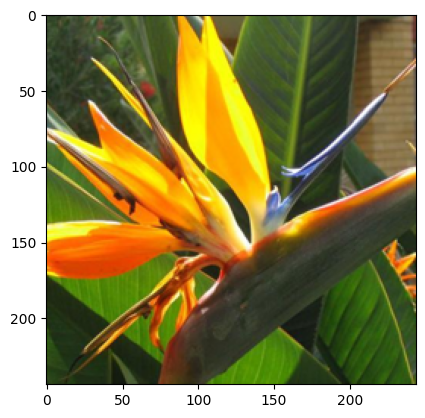

In [98]:
# check work
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

# display test image
test2 = (process_image("flowers/test/8/image_03295.jpg"))
imshow(test2)

In [110]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''

    # TODO: Implement the code to predict the class from an image file
    # set device and model to evaluate
    model.to('cuda')
    model.eval()

    # preprocess image
    img = process_image(image_path)

    # convert to tensor
    img = torch.from_numpy(img).type(torch.FloatTensor)

    # batch size of 1
    img = img.unsqueeze(0)

    with torch.inference_mode():
        # move model to same device as image tensor
        output = model.forward(img.cuda())

    # convert log probabilities to probabilities
    probability = torch.exp(output).data

    # find the top k probabilities and class indices
    top_prob, top_indices = probability.topk(topk)

    top_prob = top_prob.cpu().numpy()
    top_indices = top_indices.cpu().numpy()

    # convert indices to classes labels
    idx_to_class = {idx: class_ for class_, idx in model.class_to_idx.items()}
    top_class = [idx_to_class[idx] for idx in top_indices[0]]

    return top_prob[0].tolist(), top_class

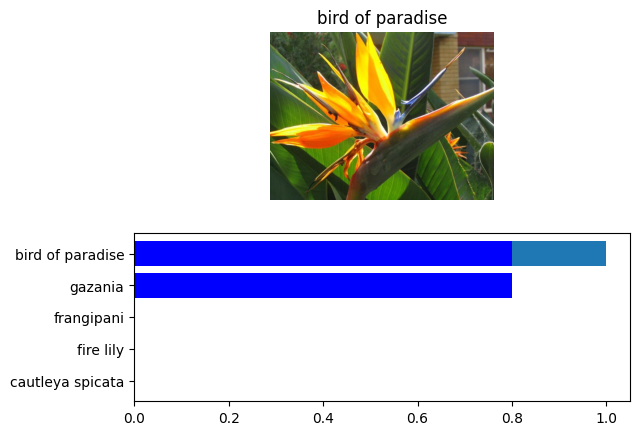

In [155]:
## Sanity Checking

# TODO: Display an image along with the top 5 classes
# set path and model to cpu
image_path = "flowers/test/8/image_03295.jpg"

# make prediction
prob, classes = predict(image_path, loaded_model)

# set up plot
fig, (ax_img, ax_barplot) = plt.subplots(nrows=2)

# display flower
ax_img.axis('off')
ax_img.imshow(flower)

# set title
name = []
for class_idx in classes:
  name.append(data[str(class_idx)])
ax_img.set_title(name[0])

# plot bar chart
ax_barplot.barh(np.arange(len(name)), prob)
ax_barplot.set_yticks(np.arange(len(name)))
ax_barplot.set_yticklabels(name)
ax_barplot.invert_yaxis()

ax_barplot.barh(prob, width = 0.8, xerr = 0, align = "center", color="blue")

plt.show()